#### Welcome to this Photutils.py demo. 
#### The code has 6 different pipelines, 3 for single images and 3 for handling multiple images, and offers a source number count pipeline as well as a photometry parameter extraction and morphology parameter extraction pipeline for all sources identified in the given images.
#### The source identification, segmentation and deblending is done using Photutils <a>https://photutils.readthedocs.io/en/stable/index.html</a>, as well as the number count and photometry parameter calculations. 
#### The morphology parameter calculations are done using statmorph <a>https://statmorph.readthedocs.io/en/latest/</a>.

#### The multiple image piplines can only accept 1 detection image but there is no such limitation for filter images.

##### JWST NIRCam image .fits file visualization

In [1]:
from astropy.io import fits

fits_file = fits.open('ceers_nircam10_f277w_v1_mbkgsub1.fits')

fits_file.info()

Filename: ceers_nircam10_f277w_v1_mbkgsub1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     372   ()      
  1  SCI_BKSUB     1 ImageHDU        75   (10500, 4800)   float64   
  2  SCI           1 ImageHDU        75   (10500, 4800)   float32   
  3  ERR           1 ImageHDU        10   (10500, 4800)   float32   
  4  CON           1 ImageHDU        10   (10500, 4800, 1)   int32   
  5  WHT           1 ImageHDU         9   (10500, 4800)   float32   
  6  VAR_POISSON    1 ImageHDU         9   (10500, 4800)   float32   
  7  VAR_RNOISE    1 ImageHDU         9   (10500, 4800)   float32   
  8  VAR_FLAT      1 ImageHDU         9   (10500, 4800)   float32   
  9  HDRTAB        1 BinTableHDU    838   6R x 414C   [23A, 5A, 3A, 56A, 7A, 13A, 3A, D, 6A, 7A, 10A, 4A, L, D, D, D, D, 4A, 19A, 62A, 22A, 3A, D, 20A, D, 10A, 12A, 23A, 23A, 26A, 11A, 5A, 3A, 3A, 2A, 1A, 2A, 1A, L, 32A, 24A, 2A, 26A, 20A, 27A, 10A, K, L, L, L, L, 29A, 1A, 5A, D, D, D

In [2]:
from Photutils import *

# Image initialization

In [3]:
image = ImageFromArrays(data_bkgsub=fits_file[1].data, img_name='NIRCAM10_F277W', bkg_sub=fits_file[11].data, 
                        bkg_err=np.sqrt(fits_file[7].data), wht=fits_file[5].data, 
                        gain = None, err_tot=fits_file[3].data, mask = None, mask_edge_thickness=10)

##### Stars aren't handled well by our code it is recommended to remove them beforehand or to make a cutout of a starless region when using this code.

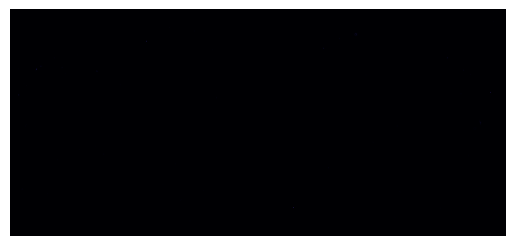

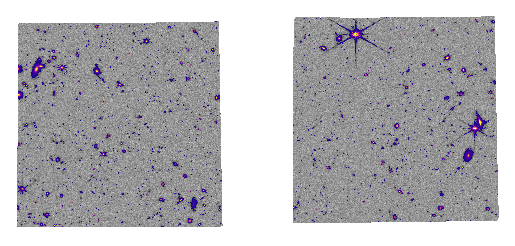

In [4]:
make_img_panel(image)
make_significance_panel(image)

##### The cutout below is a starless 500 x 500 region of our image that we'll use for the demo

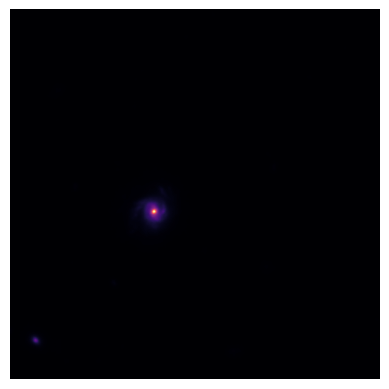

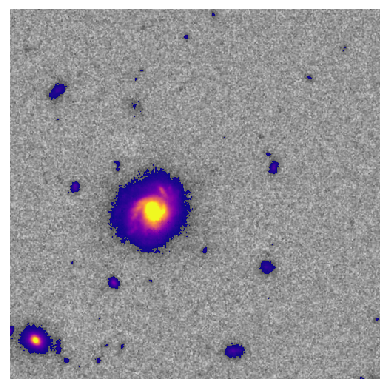

In [5]:
cutout=make_cutout(image, rowmin=2100, rowmax=2600, colmin=8000, colmax=8500)
make_img_panel(cutout)
make_significance_panel(cutout)

# Single image handling

### Number counts

Deblending:   0%|          | 0/28 [00:00<?, ?it/s]

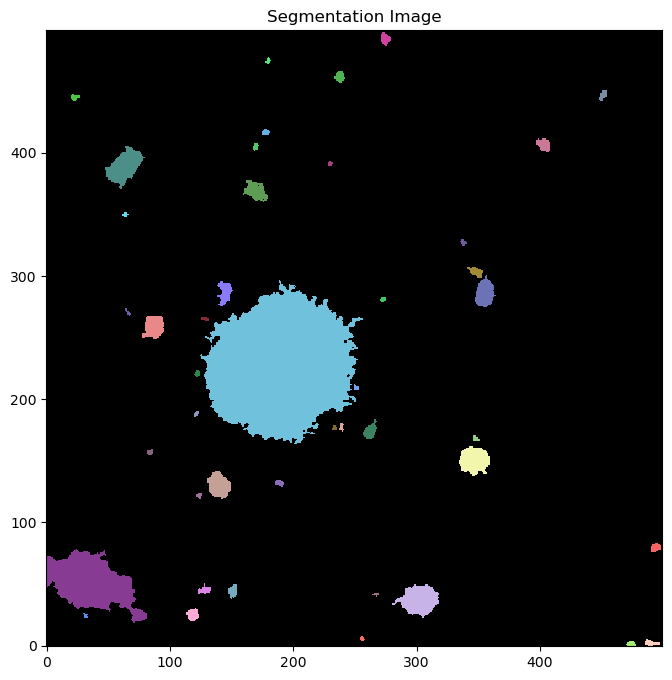

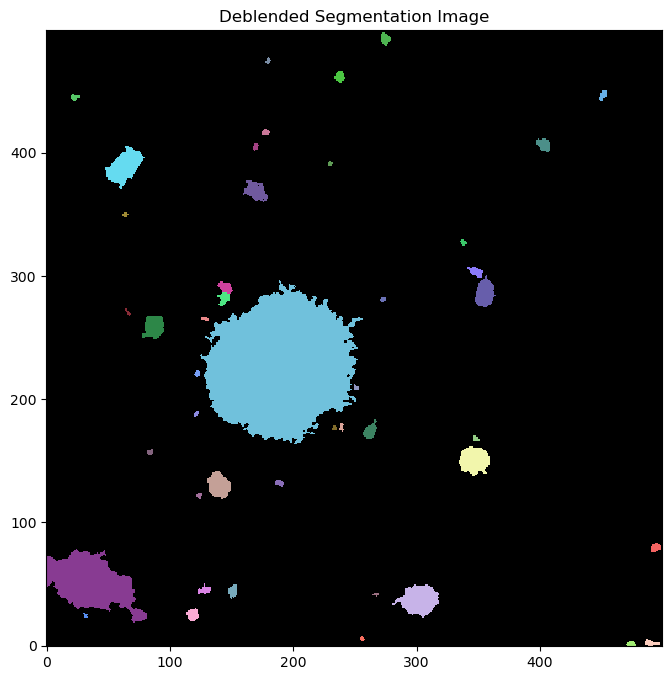

45

In [6]:
process_image_number_counts(cutout, 1.5, 10, 16, 0.1, labels=None, connectivity=8, mode='exponential', smooth_data=True, 
                            kernel_name='Tophat', smooth_fwhm=3, kernel_size=5, relabel=True, nproc=1, progress_bar=True, 
                            show_plots=True)

### Morphology

In [7]:
morphologies = process_image_morphology(cutout, ['concentration', 'asymmetry', 'smoothness', 'gini', 'flag'], 1.5, 10, 16, 0.1, 
                                        labels=None, connectivity=8, mode='exponential', smooth_data=True, 
                                        kernel_name='Tophat', smooth_fwhm=3, kernel_size=5, relabel=True, nproc=1, 
                                        progress_bar=True, show_plots=False, psf=None, cutout_extent=2.5, min_cutout_size=48, 
                                        n_sigma_outlier=10, annulus_width=1.0, eta=0.2, petro_fraction_gini=0.2, 
                                        skybox_size=32, petro_extent_cas=1.5, petro_fraction_cas=0.25, boxcar_size_mid=3.0, 
                                        niter_bh_mid=5, sigma_mid=1.0, petro_extent_flux=2.0, boxcar_size_shape_asym=3.0, 
                                        sersic_fitting_args=None, sersic_model_args=None, sersic_maxiter=None, 
                                        include_doublesersic=False, doublesersic_rsep_over_rhalf=2.0, 
                                        doublesersic_tied_ellip=False, doublesersic_fitting_args=None, 
                                        doublesersic_model_args=None, segmap_overlap_ratio=0.25, verbose=False)

print('concentration', morphologies['concentration'])
print('asymmetry', morphologies['asymmetry'])
print('smoothness', morphologies['smoothness'])
print('gini', morphologies['gini'])

Deblending:   0%|          | 0/28 [00:00<?, ?it/s]

concentration [2.4256687195322257, 2.801666656527913, 2.4010879317432736, 2.8376938773229177, 2.323892266787271, 2.0979642162704963, 2.423462084571236, 2.5978467772898988, 3.007024037061096, 2.5196543439710934, 2.5563673398616995, 3.342888921935658, 2.5847246149404066, 2.7297655600793522, 2.3828567911769123, 1.9055496770924643, 3.013530283307986, 2.86462436453024, 2.997356617559275, 1.844463630895659, 2.0183133231208426, 1.6147236751079654, 1.9863773508789972, 2.3038722017918025, 2.4864171182120343, 2.316559208584365, 2.072060984224081, 2.5740054532267354, 3.0684439321683272, 2.873617607961107, 1.7207352633949415, 2.1911388072301, 2.355279042017189, 2.6319459676683965, 1.783722446130177, 2.2758179769956093, 3.780845026339132, 2.534495098124551, 2.4960977163960516, 2.369768062319069, 2.5912917565732725, 1.8502252994576198, 2.4161224099904692, 2.314785667349977, 3.808960576428296]
asymmetry [-0.06090205747252956, -0.31276467242637485, -0.29311045893353843, 0.03541000723590685, 0.16384630

##### The flag parameter indicates the quality of the morphology measurements performed on the identified sources

In [8]:
print('Number of good sources : ', morphologies['flag'].count(0))
print('Number of suspect sources : ', morphologies['flag'].count(1))
print('Number of bad sources : ', morphologies['flag'].count(2))
print('Number of catastrophic sources : ', morphologies['flag'].count(4))

Number of good sources :  11
Number of suspect sources :  26
Number of bad sources :  8
Number of catastrophic sources :  0


##### Although not directly included in the pipeline, it is possible to visualize some of the morphological measurements performed by statmorph. Here we'll only look at the "good" sources. 

Flag = 0 objects :  11 / 45


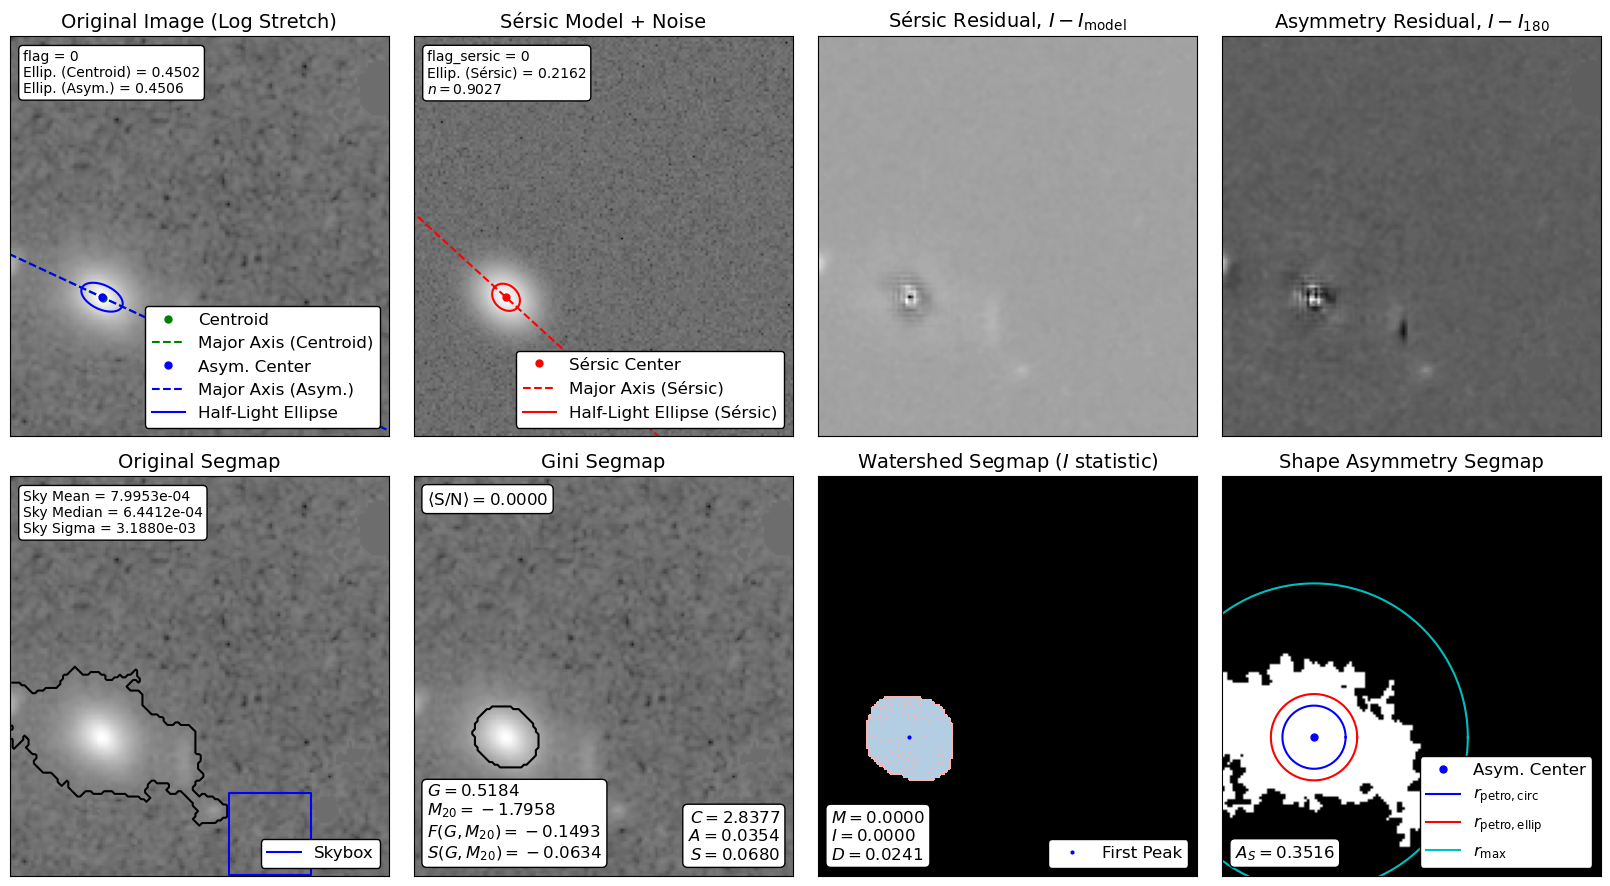

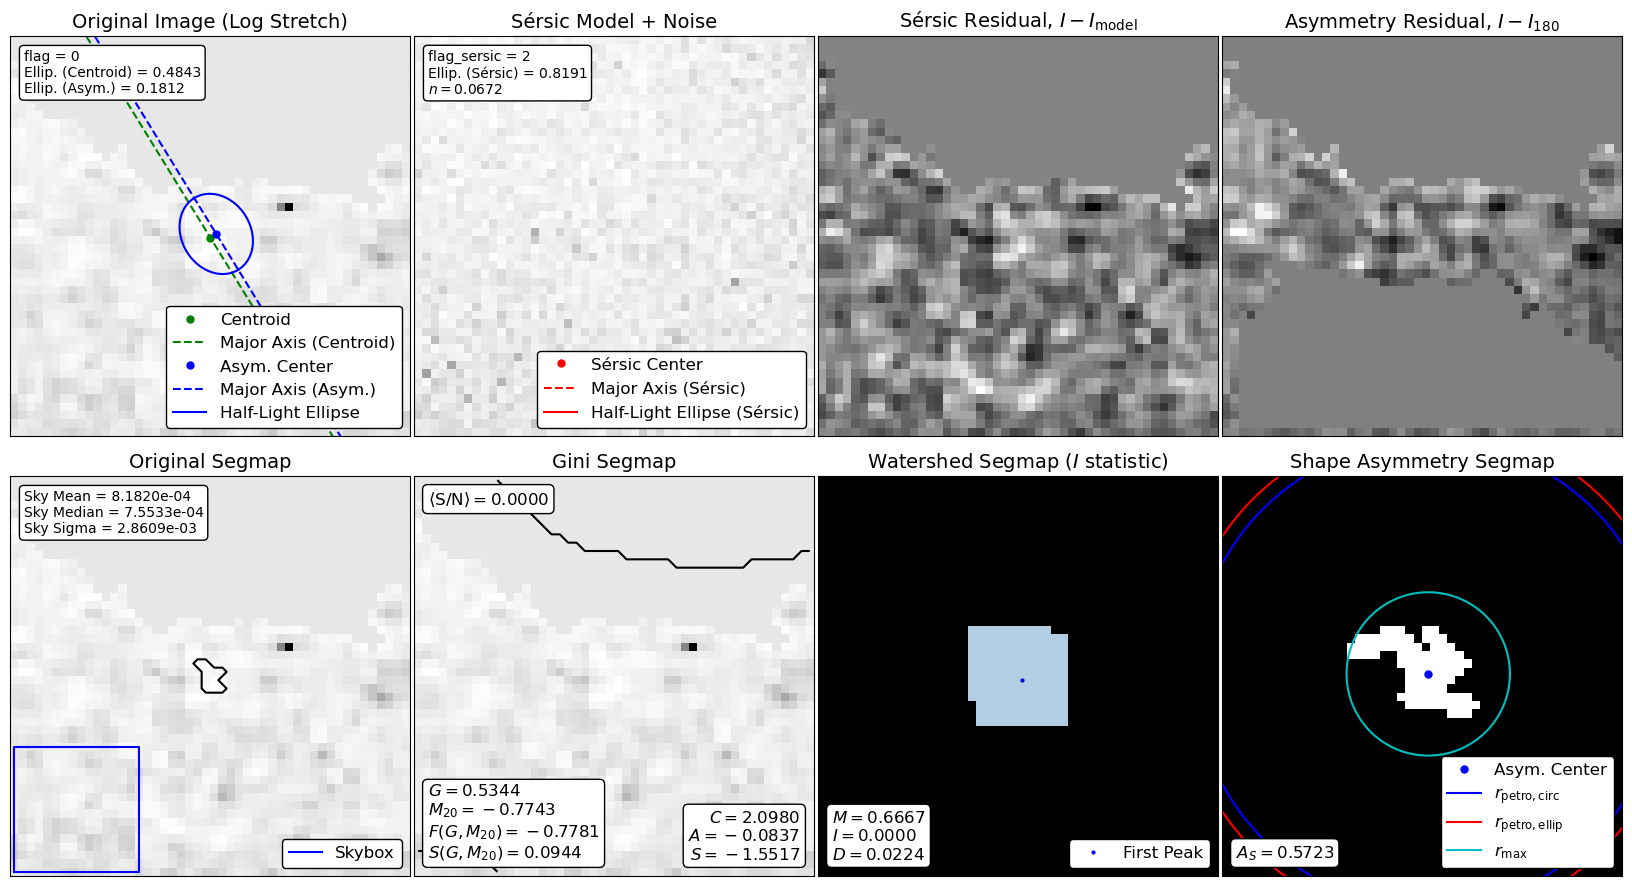

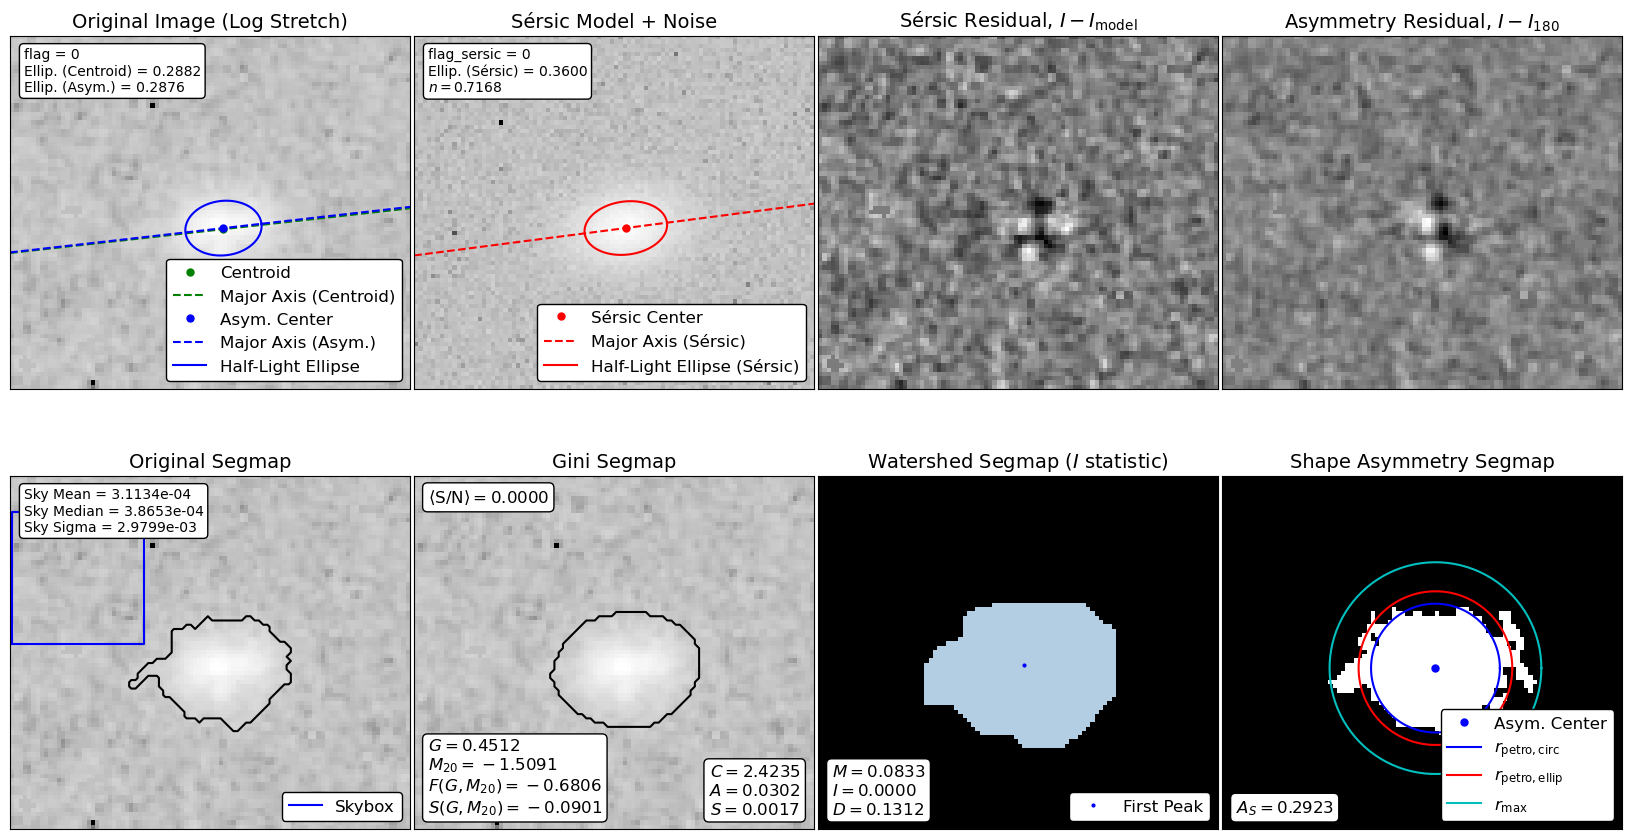

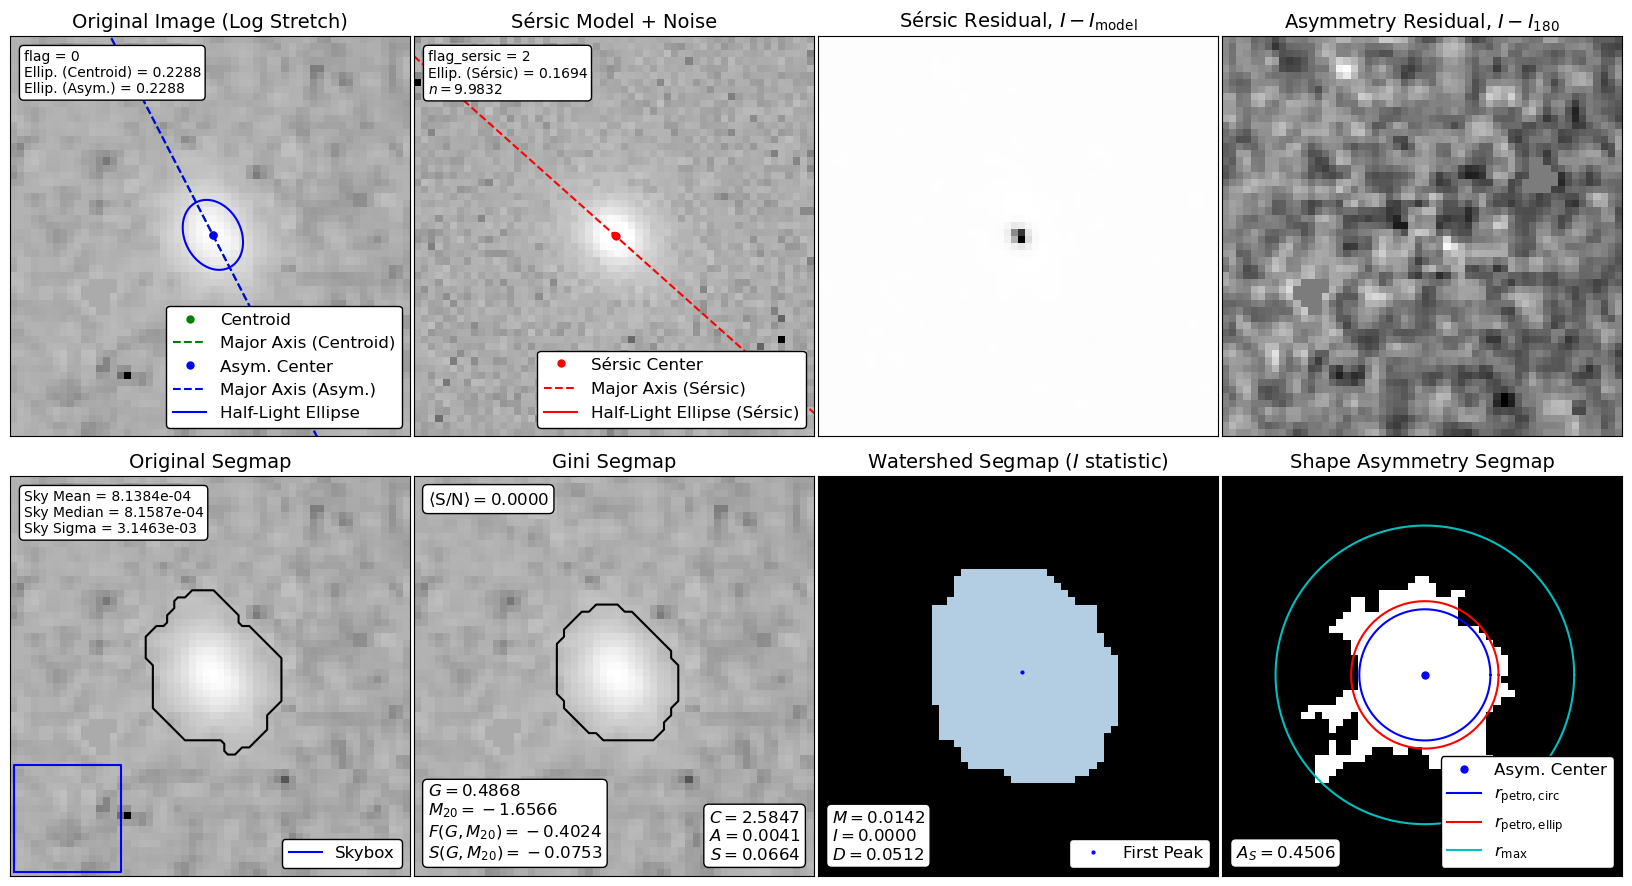

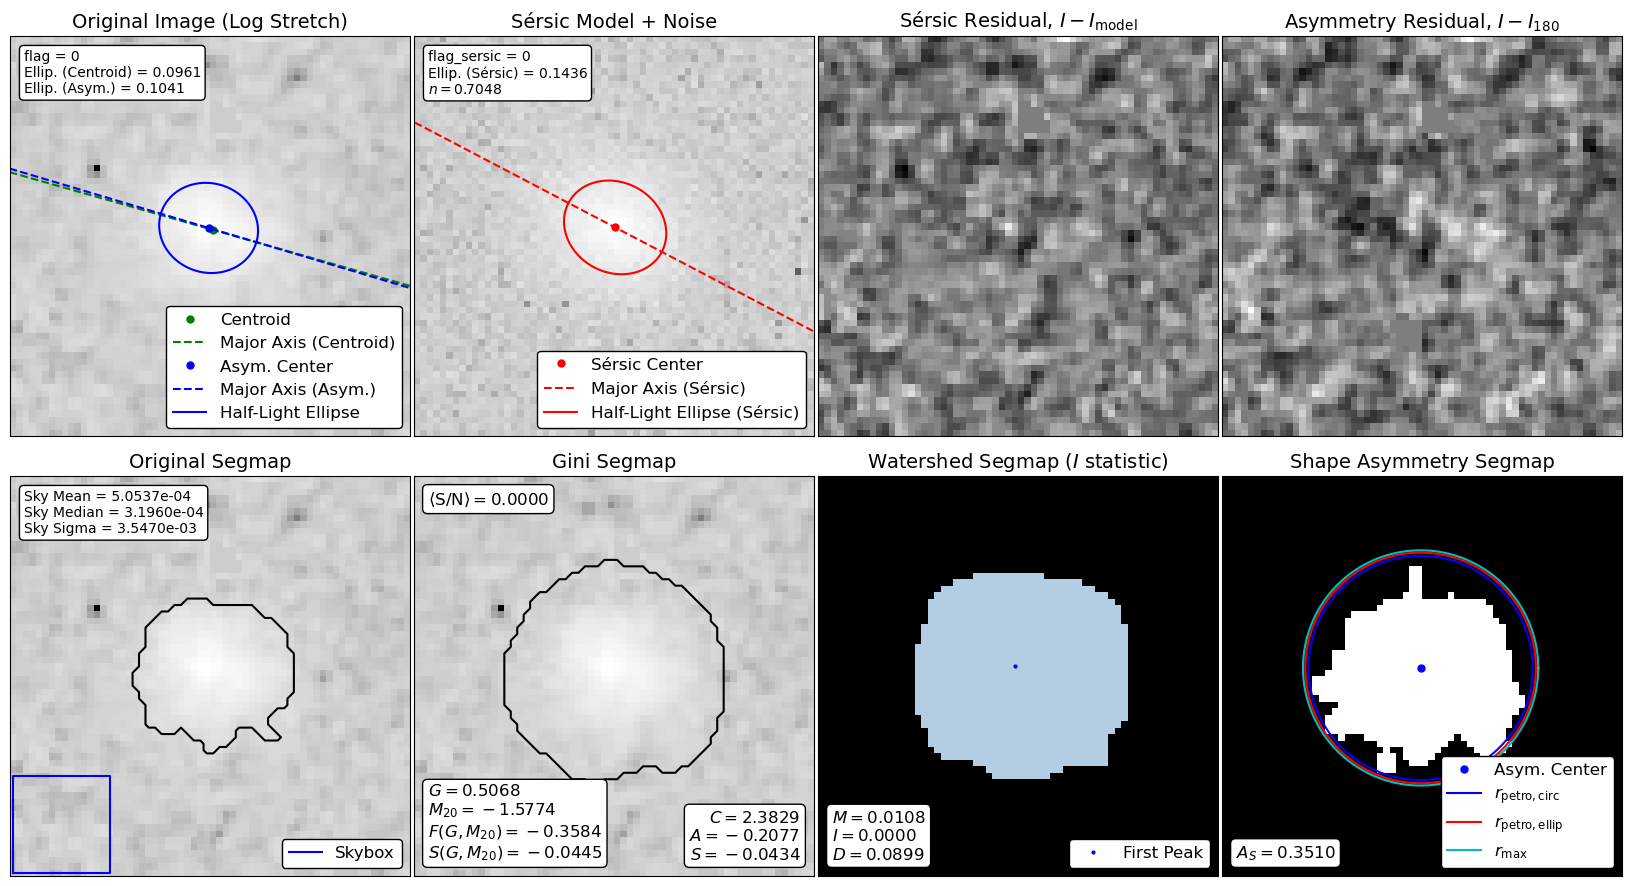

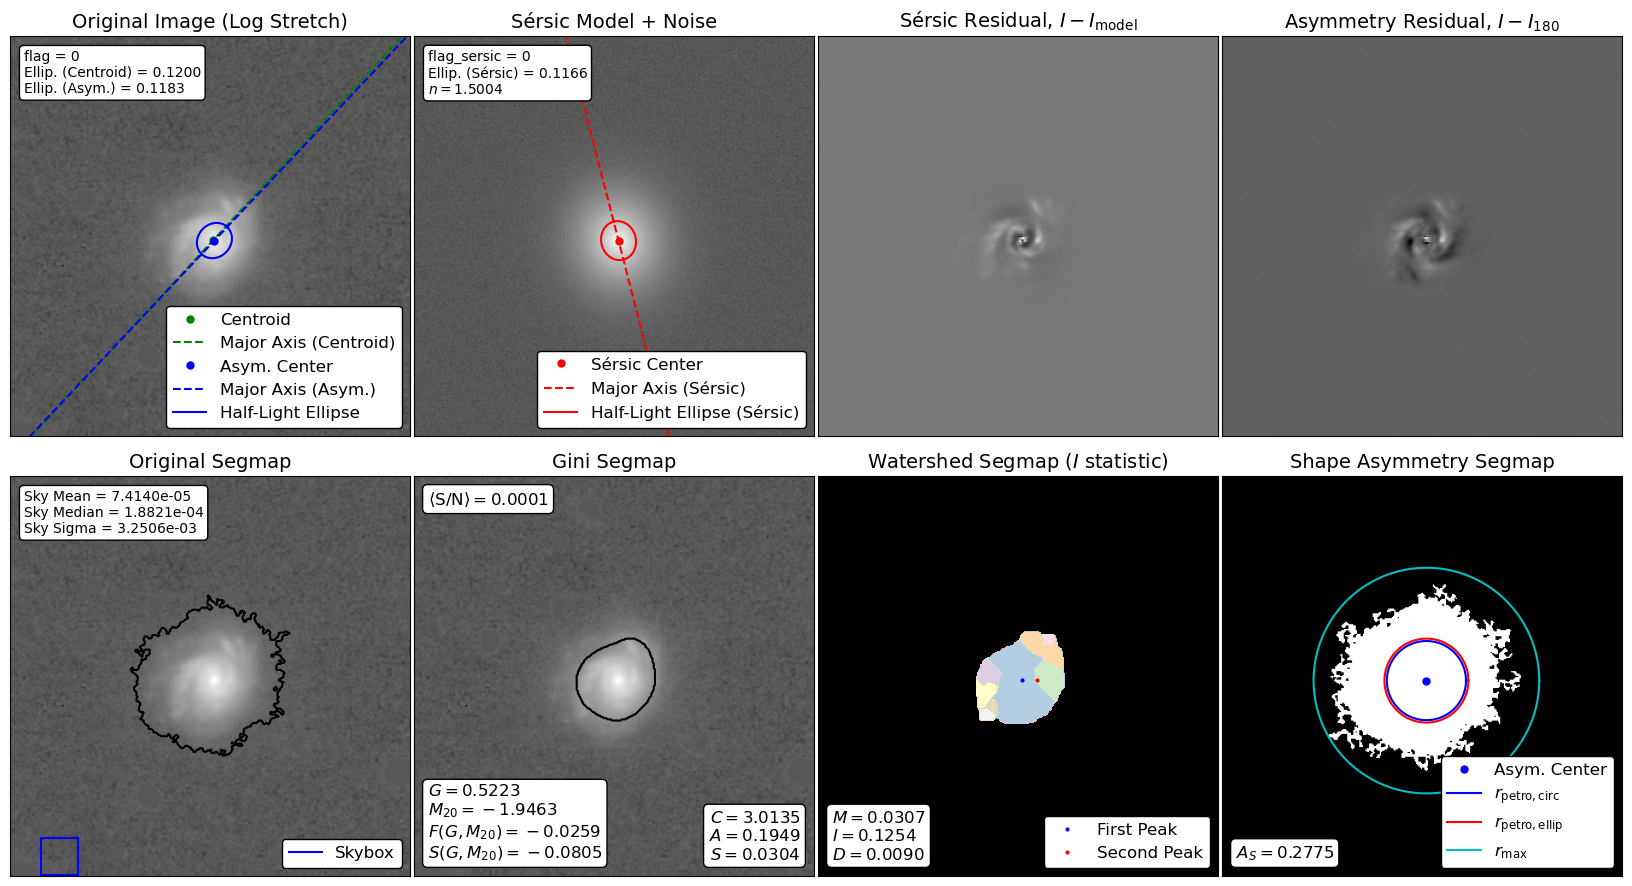

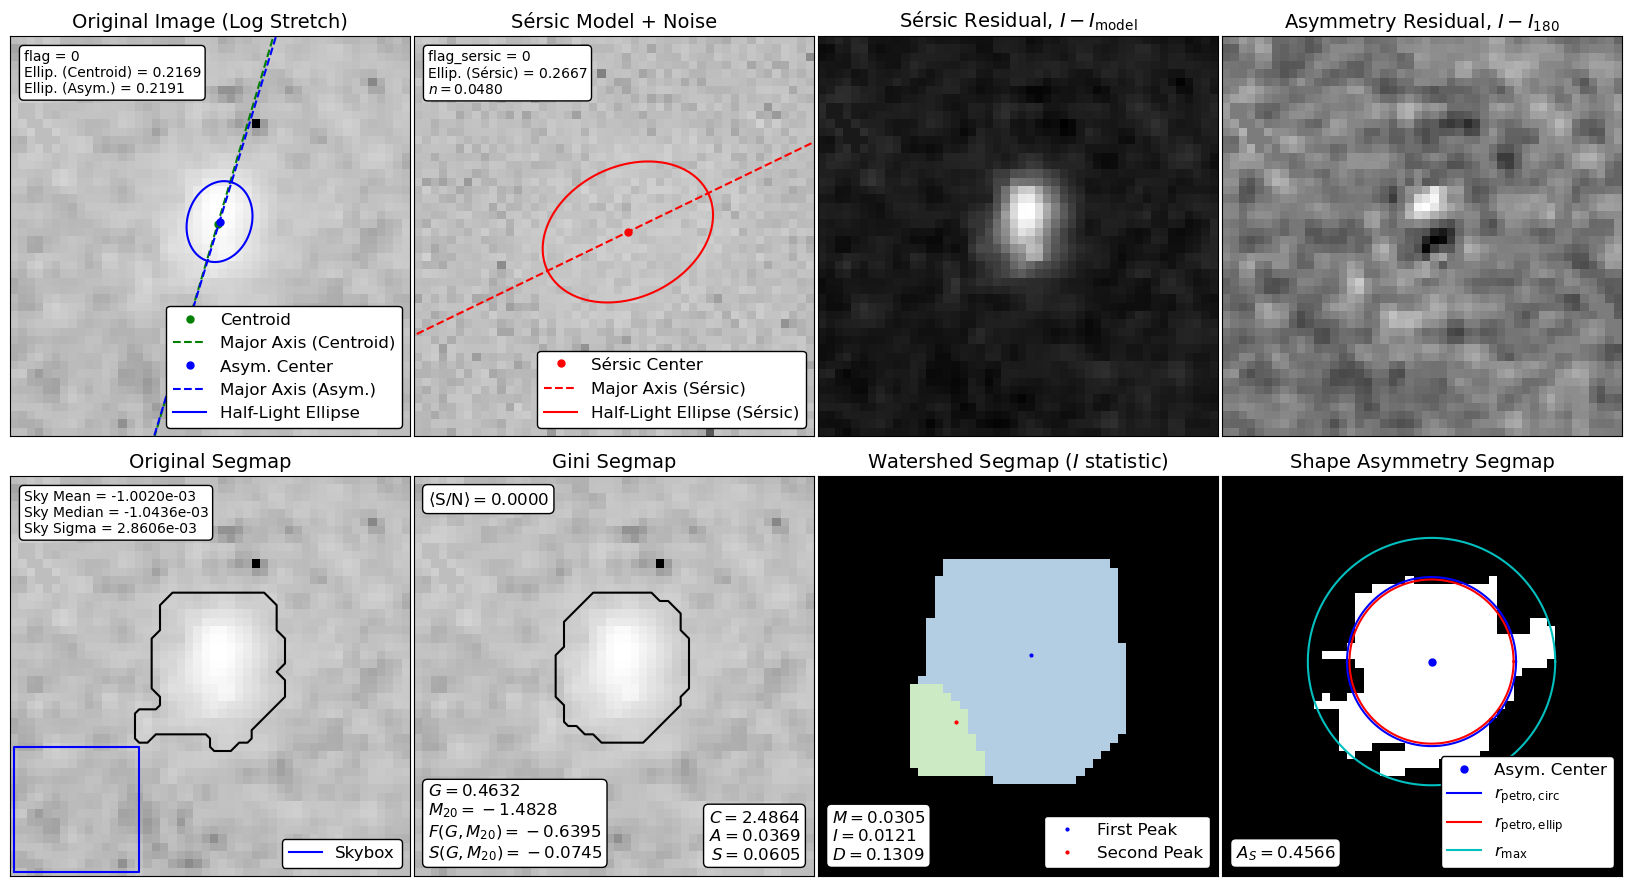

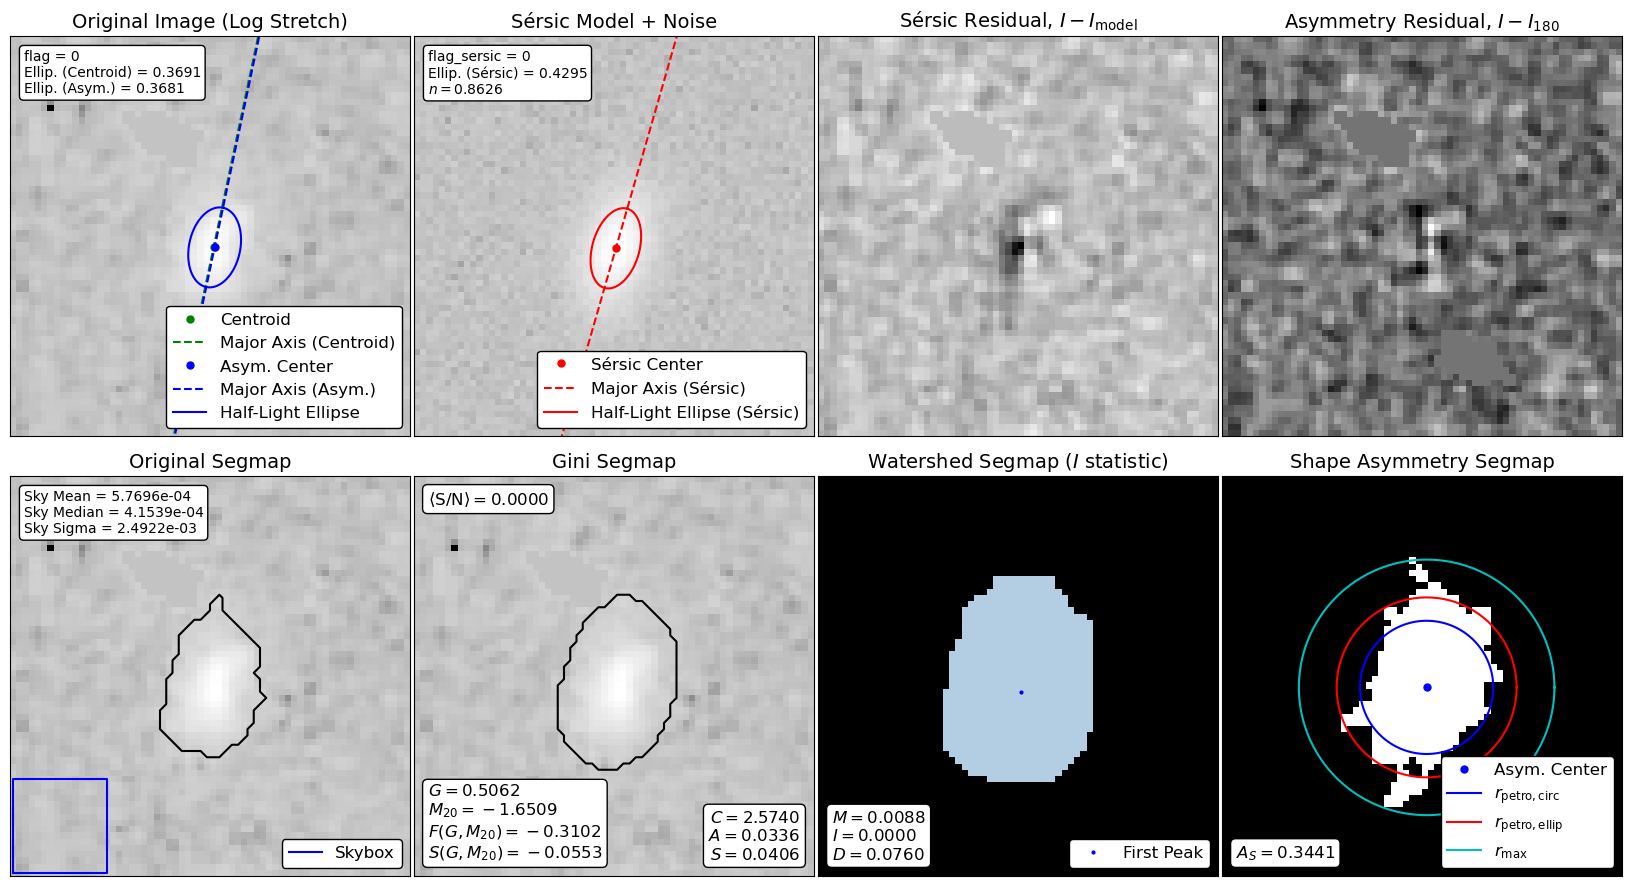

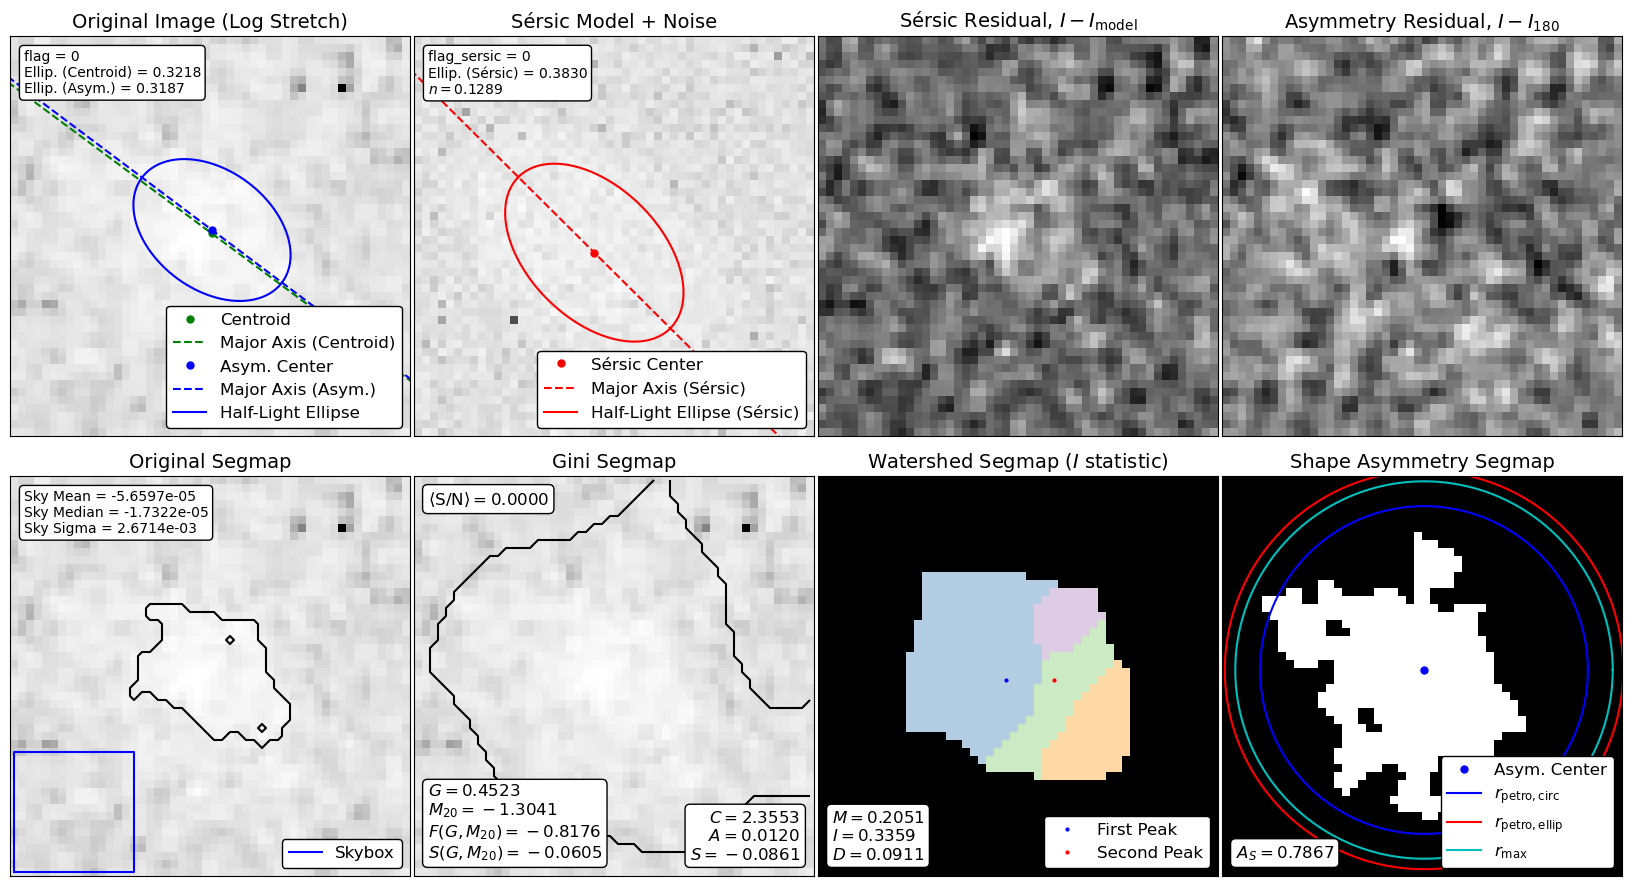

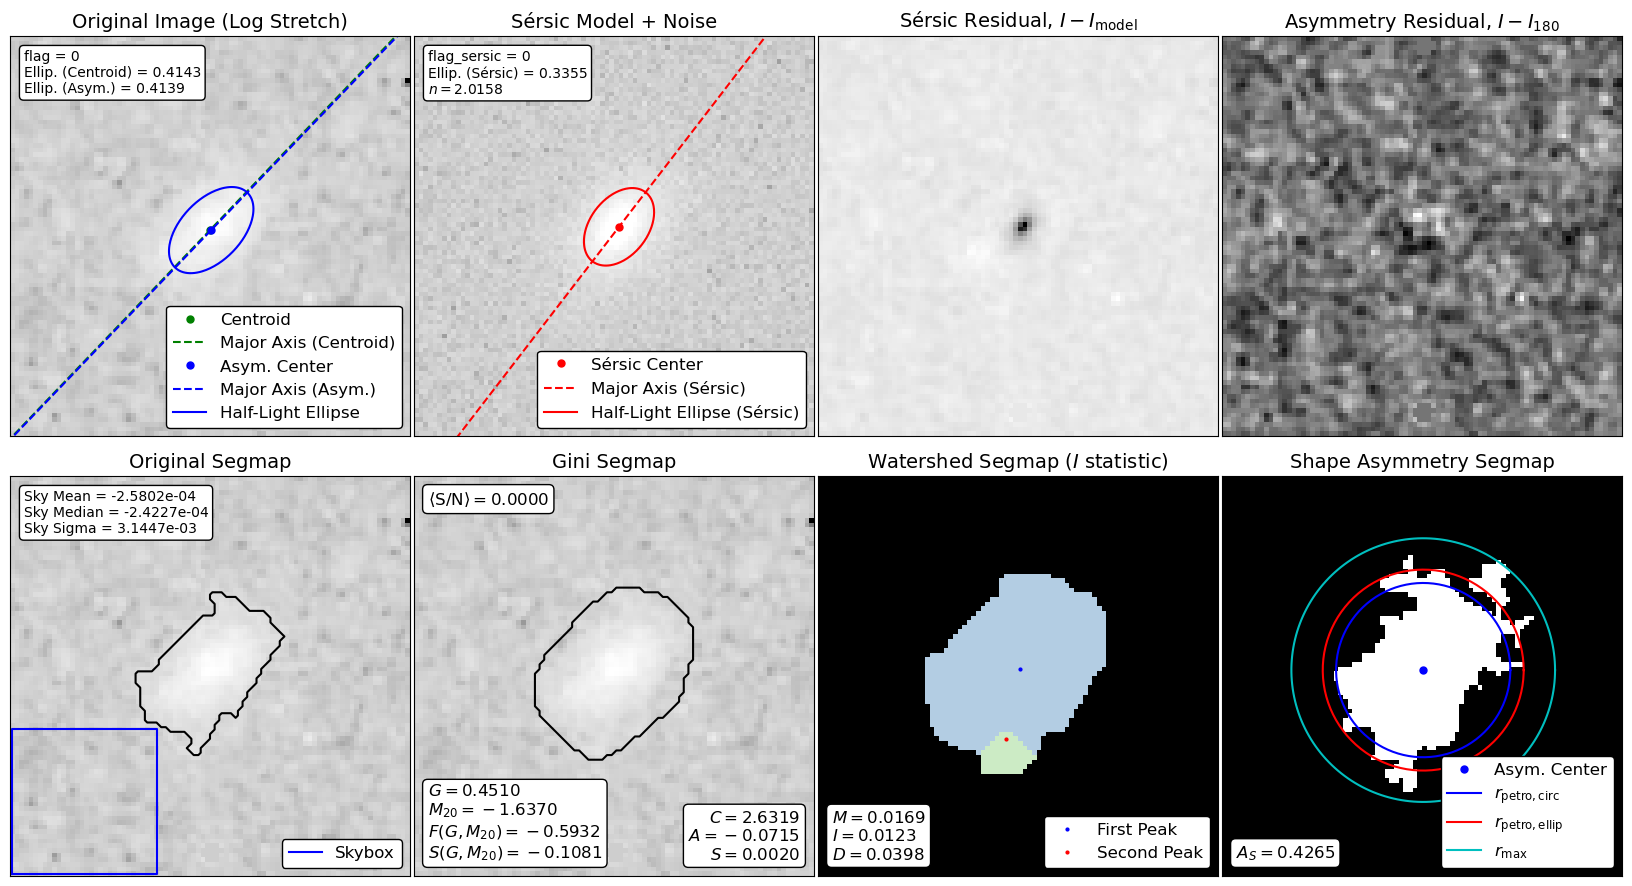

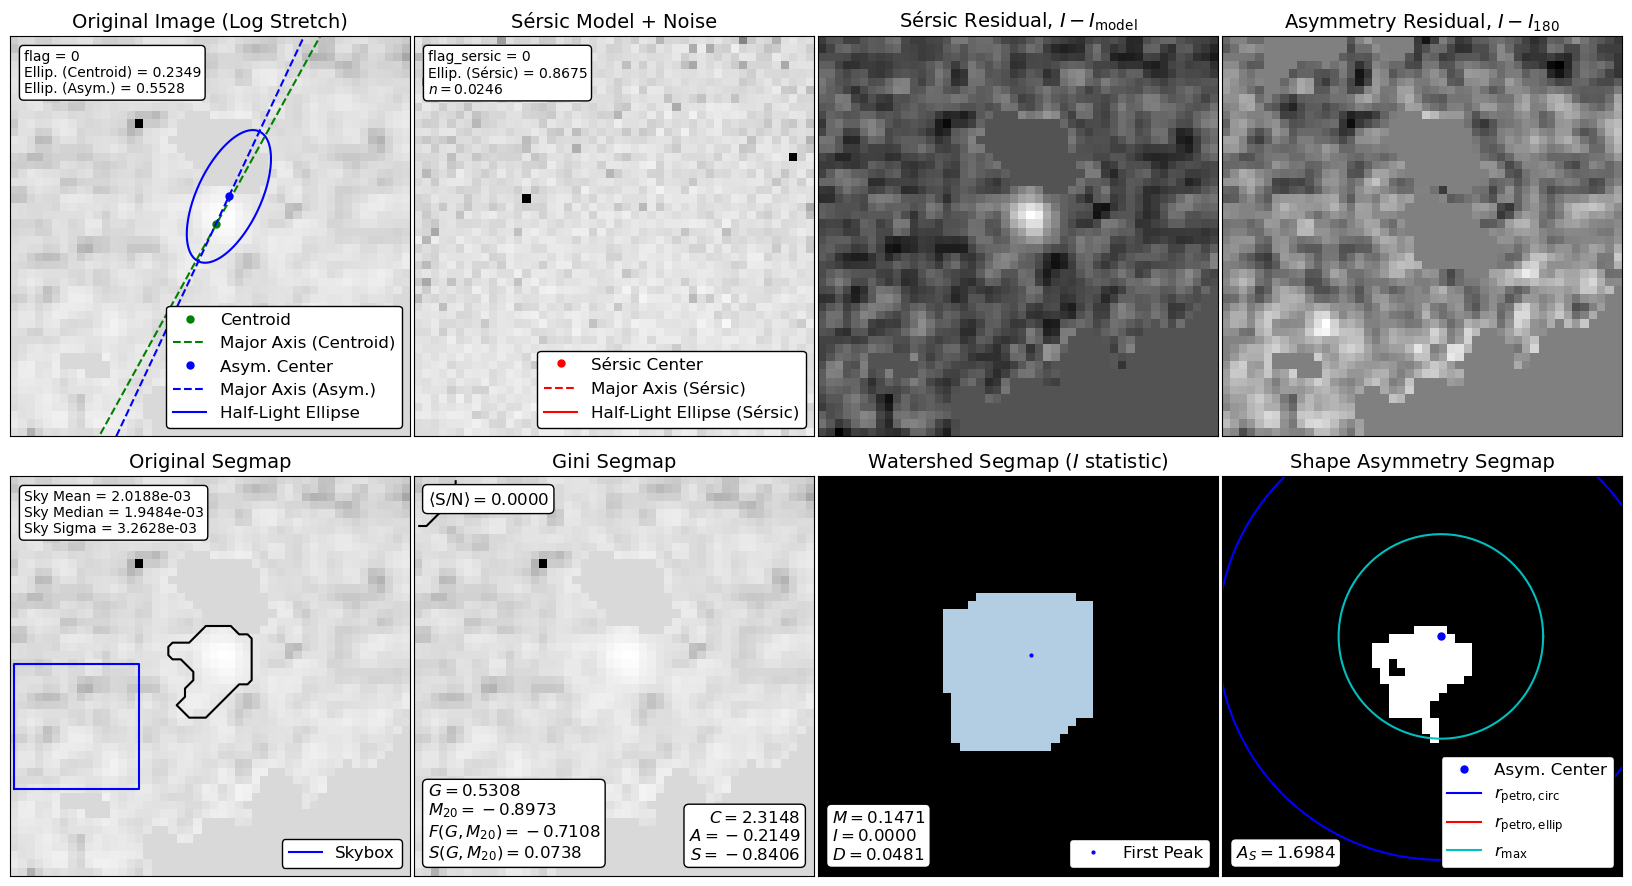

In [9]:
from statmorph.utils.image_diagnostics import make_figure

index=[]
for i in range(len(cutout.morphologies)):
    if cutout.morphologies[i].flag==0:
        index.append(i)
print('Flag = 0 objects : ', len(index), '/', len(cutout.morphologies))       

for i in index:
    make_figure(cutout.morphologies[i])

### Photometry

In [10]:
photometry = process_image_photometry(cutout, ['centroid', 'segment_flux', 'gini'], 1.5, 10, 16, 0.1, (2.5, 1.4, 0.0), 
                                      labels=None, connectivity=8, mode='exponential', local_bkg_width=0, 
                                      apermask_method='correct', smooth_data=True, kernel_name='Tophat', smooth_fwhm=3, 
                                      kernel_size=5, detection_cat=None, relabel=True, wcs='None', nproc=1, progress_bar=True, 
                                      show_plots=False)

print('centroid', photometry['centroid'])
print('segment_flux', photometry['segment_flux'])
print('gini', photometry['gini'])

Deblending:   0%|          | 0/28 [00:00<?, ?it/s]

centroid [[474.66069129   1.27823508]
 [490.2610807    2.11095782]
 [256.26572375   5.32182668]
 [ 34.63729553  51.74061461]
 [118.78490513  24.7054999 ]
 [ 31.58563384  24.36082358]
 [302.49472396  37.05015218]
 [151.18783046  43.70897671]
 [267.29299734  41.28696878]
 [128.25266202  44.78485505]
 [494.50431762  79.56901778]
 [124.04231858 121.27476923]
 [139.90595093 129.63508734]
 [189.08295497 131.93156513]
 [346.93613919 150.45086469]
 [ 84.09613357 156.84740906]
 [193.12933527 226.00203613]
 [348.60672711 167.66743254]
 [262.68790005 173.91331852]
 [239.53818419 176.96227992]
 [233.59858035 176.20212077]
 [121.51239962 188.00714732]
 [251.30241886 209.42488128]
 [122.43148272 220.5382706 ]
 [ 87.4486008  258.97370362]
 [128.72404022 265.1202212 ]
 [ 65.841907   270.58152329]
 [356.07018268 285.68485022]
 [273.13877941 280.61254246]
 [348.60471033 303.20675932]
 [338.48143834 326.97427198]
 [ 63.81600545 349.55851583]
 [169.6800928  368.78834855]
 [ 63.50413584 388.80305328]
 [230

# Multiple image handling

### Number counts

Deblending:   0%|          | 0/28 [00:00<?, ?it/s]

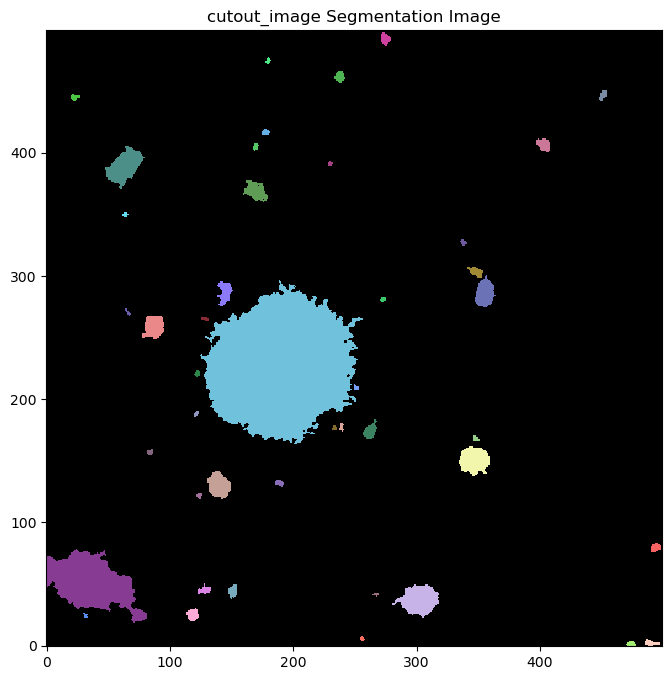

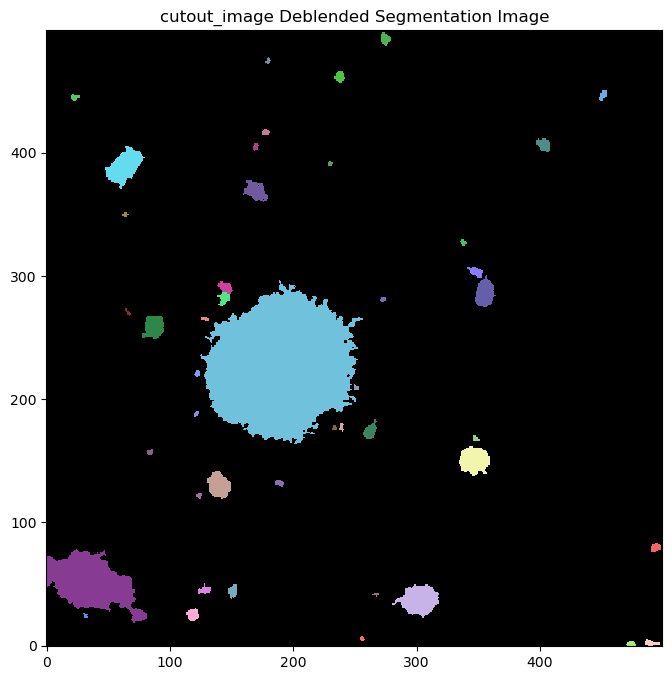

Deblending:   0%|          | 0/4864 [00:00<?, ?it/s]

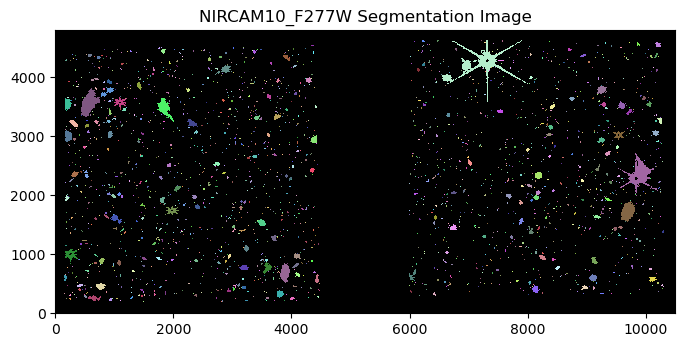

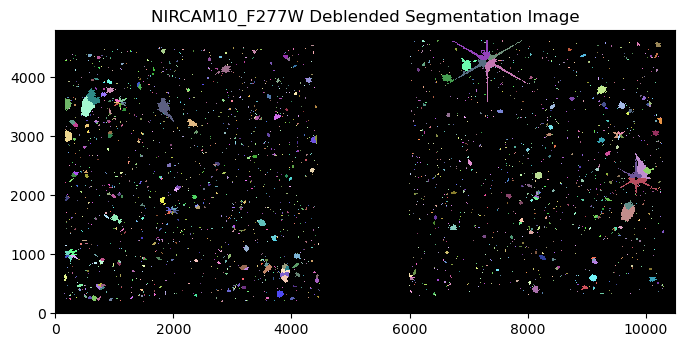

{'cutout_image': 45, 'NIRCAM10_F277W': 7286}

In [11]:
process_images_number_counts([cutout, image], 1.5, 10, 16, 0.1, labels=None, connectivity=8, mode='exponential', 
                             smooth_data=True, kernel_name='Tophat', smooth_fwhm=3, kernel_size=5, relabel=True, nproc=1, 
                             progress_bar=True, show_plots=True)

##### When handling multiple images, the ouput will be stored in a dictionary where the keys are the names of the provided images

##### As mentioned previously, stars aren't handled well and get deblended into many different sources. These should be eliminated beforehand.

### Morphology

In [12]:
process_images_morphology(cutout, [cutout], ['concentration', 'asymmetry', 'smoothness', 'gini'], 1.5, 10, 16, 0.1, 
                          'test_morph.h5', labels=None, connectivity=8, mode='exponential', smooth_data=True, 
                          kernel_name='Tophat', smooth_fwhm=3, kernel_size=5, relabel=True, nproc=1, progress_bar=True, 
                          show_plots=False, psf=None, cutout_extent=2.5, min_cutout_size=48, n_sigma_outlier=10, 
                          annulus_width=1.0, eta=0.2, petro_fraction_gini=0.2, skybox_size=32, petro_extent_cas=1.5, 
                          petro_fraction_cas=0.25, boxcar_size_mid=3.0, niter_bh_mid=5, sigma_mid=1.0, petro_extent_flux=2.0, 
                          boxcar_size_shape_asym=3.0, sersic_fitting_args=None, sersic_model_args=None, sersic_maxiter=None, 
                          include_doublesersic=False, doublesersic_rsep_over_rhalf=2.0, doublesersic_tied_ellip=False, 
                          doublesersic_fitting_args=None, doublesersic_model_args=None, segmap_overlap_ratio=0.25, 
                          verbose=False)

Deblending:   0%|          | 0/28 [00:00<?, ?it/s]

##### When handling multiple images, the ouput will be stored in hdf5 files. The format is : 
##### Morph / Detection or Filter image / name of the image / image property (segmentation map for the detection image and morphological properties for the filter images)

In [13]:
import h5py

# Open the HDF5 file
with h5py.File('test_morph.h5', 'r') as f:
    # Print all group names
    def print_attrs(name, obj):
        print(f"{name}")
        for key, val in obj.attrs.items():
            print(f"  {key}: {val}")

    f.visititems(print_attrs)

Morph
Morph/Detection_Image
Morph/Detection_Image/cutout_image
Morph/Detection_Image/cutout_image/segmentation_map
Morph/Filter_Images
Morph/Filter_Images/cutout_image
Morph/Filter_Images/cutout_image/asymmetry
Morph/Filter_Images/cutout_image/concentration
Morph/Filter_Images/cutout_image/gini
Morph/Filter_Images/cutout_image/smoothness


### Photometry

In [14]:
process_images_photometry(cutout, [cutout], ['centroid', 'segment_flux', 'gini'], 1.5, 10, 16, 0.1, (2.5, 1.4, 0.0), 
                          'test_phot.h5', labels=None, connectivity=8, mode='exponential', local_bkg_width=0, 
                          apermask_method='correct', smooth_data=True, kernel_name='Tophat', smooth_fwhm=3, kernel_size=5, 
                          detection_cat=None, relabel=True, wcs='None', nproc=1, progress_bar=True, show_plots=False)

Deblending:   0%|          | 0/28 [00:00<?, ?it/s]

##### When handling multiple images, the ouput will be stored in hdf5 files. The format is : 
##### Photo / Detection or Filter image / name of the image / image property (segmentation map for the detection image and photometric properties for the filter images)

In [15]:
import h5py

# Open the HDF5 file
with h5py.File('test_phot.h5', 'r') as f:
    # Print all group names
    def print_attrs(name, obj):
        print(f"{name}")
        for key, val in obj.attrs.items():
            print(f"  {key}: {val}")

    f.visititems(print_attrs)

Photo
Photo/Detection_Image
Photo/Detection_Image/cutout_image
Photo/Detection_Image/cutout_image/segmentation_map
Photo/Filter_Images
Photo/Filter_Images/cutout_image
Photo/Filter_Images/cutout_image/centroid
Photo/Filter_Images/cutout_image/gini
Photo/Filter_Images/cutout_image/segment_flux


# Image attribute plots

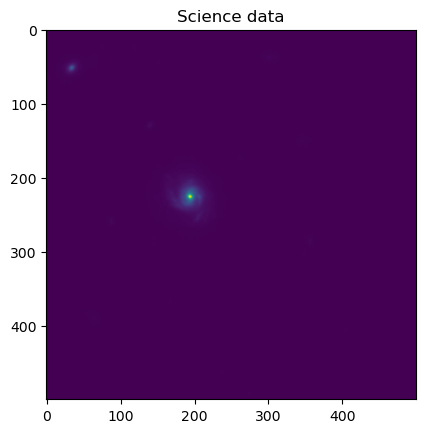

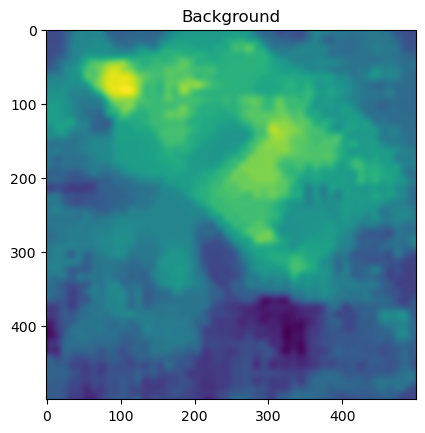

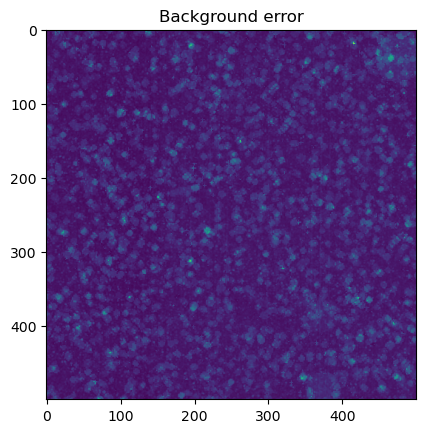

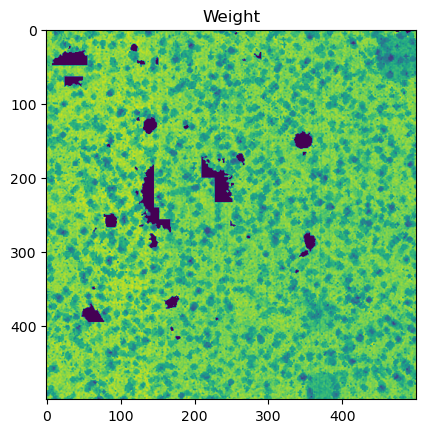

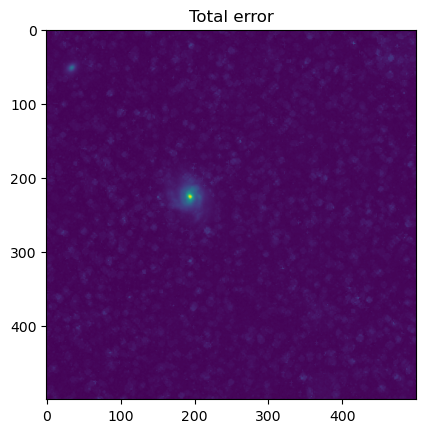

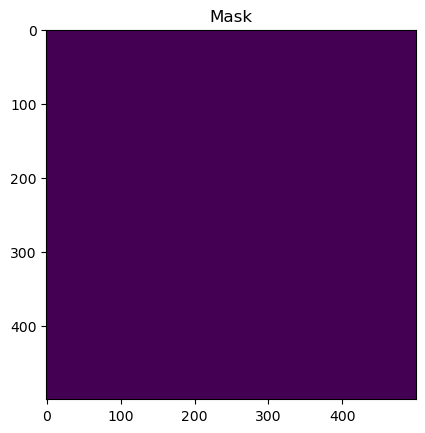

In [16]:
import matplotlib.pyplot as plt

plt.imshow(cutout.sci)
plt.title('Science data')
plt.show()

plt.imshow(cutout.bkg)
plt.title('Background')
plt.show()

plt.imshow(cutout.bkg_err)
plt.title('Background error')
plt.show()

plt.imshow(cutout.wht)
plt.title('Weight')
plt.show()

plt.imshow(cutout.err)
plt.title('Total error')
plt.show()

plt.imshow(cutout.mask)
plt.title('Mask')
plt.show()

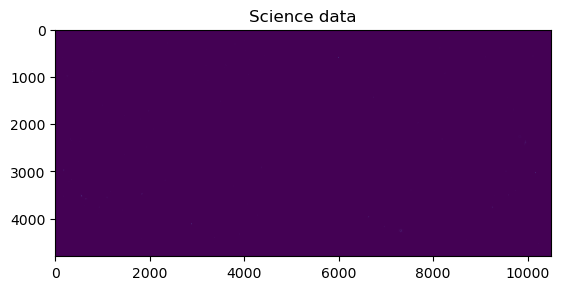

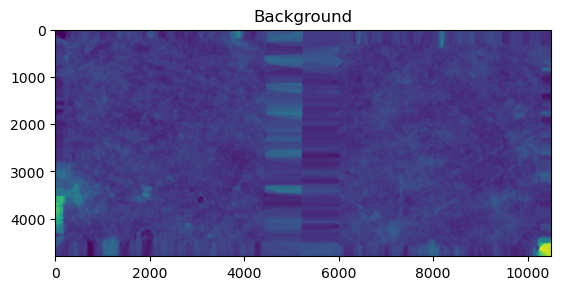

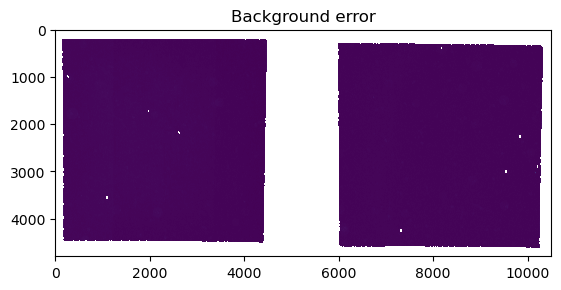

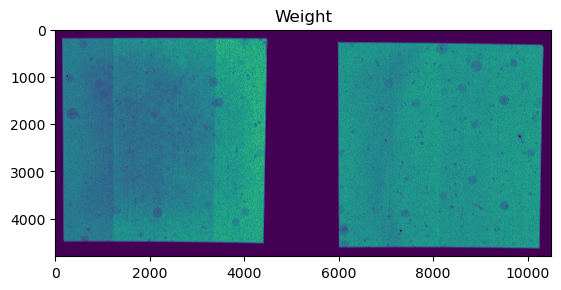

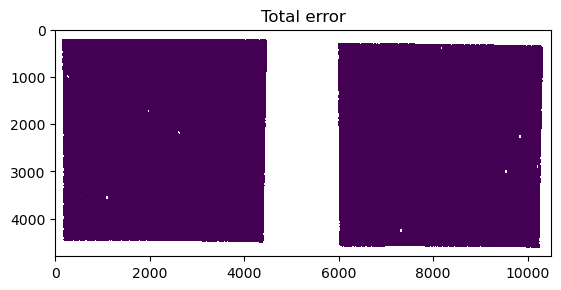

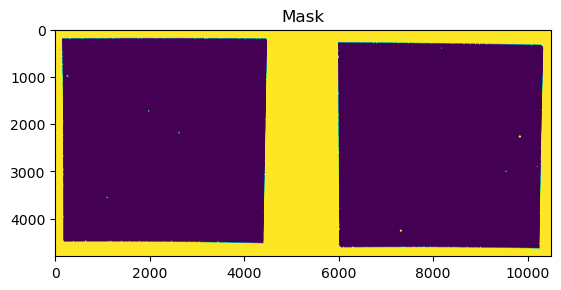

In [17]:
import matplotlib.pyplot as plt

plt.imshow(image.sci)
plt.title('Science data')
plt.show()

plt.imshow(image.bkg)
plt.title('Background')
plt.show()

plt.imshow(image.bkg_err)
plt.title('Background error')
plt.show()

plt.imshow(image.wht)
plt.title('Weight')
plt.show()

plt.imshow(image.err)
plt.title('Total error')
plt.show()

plt.imshow(image.mask)
plt.title('Mask')
plt.show()